In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import torch
import sys
sys.path.append("../")
import cdatasets as ds
import numpy as np
from joblib import Parallel, delayed

In [2]:
data = ds.RawNormUltrasoundDataset()

In [3]:
def viz_input(idx):
    x, _ = data[idx]
    x_chunked = x.squeeze().chunk(1509, dim=0)
    fig, ax = plt.subplots()
    img = ax.imshow(x_chunked[0][0], animated=True)

    def update(frame):
        ax.set_title(f"ds: {data.id} frame: {frame}")
        img.set_array(x_chunked[frame][0])
        return img,

    ani = animation.FuncAnimation(fig, update, frames=range(1509), interval=10)
    ani.save(f"data/input_viz/{idx}.mp4", writer=animation.FFMpegWriter(fps=60))

In [4]:
torch.max(data[0][0])

tensor(1.3165)

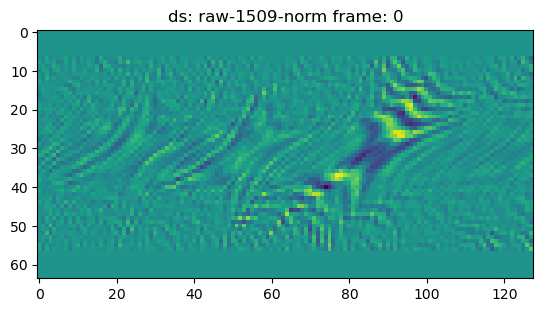

In [5]:
viz_input(0)

In [10]:
Parallel(n_jobs=-1)(delayed(viz_input)(idx) for idx in range(10))

KeyboardInterrupt: 